# A Minimal Example of rBCM

We begin by importing our rBCM library, numpy to generate some data arrays, and matplotlib to look at the output.

In [8]:
%matplotlib notebook

import numpy as np
from rBCM.rbcm import RobustBayesianCommitteeMachineRegressor as RBCM
import matplotlib.pylab as plt

We need some simple dataset that we can fit a model to. We define a function that samples from the real underlying population's distribution.

In [9]:
def underlying_population_function(x):
    return np.abs(np.sin(x)) * 5 + np.random.rand(*x.shape)

And we will sample 100 points in a window over 10-20.

In [10]:
X = np.linspace(10, 20, 100).reshape(-1, 1)
y = underlying_population_function(X)

Let's first look at our data to get a sense of it. It has a periodic trend and with some random variation.

<IPython.core.display.Javascript object>


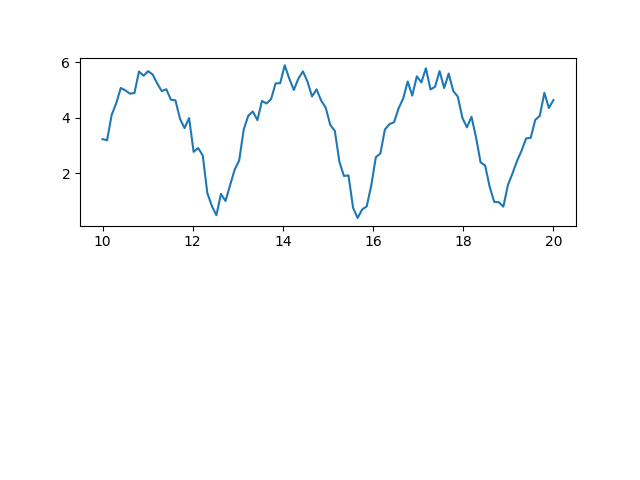

In [12]:
plt.figure(1)
plt.subplot(211)
plt.plot(X, y);

## Fitting and predicting with the rBCM

Now we begin using the `rBCM` package. It has a similar syntax to `sklearn` models.

In [13]:
machine = RBCM()
machine.fit(X, y)
predictions = machine.predict(X)

/usr/lib/python3.6/site-packages/scikit_learn-0.18.1-py3.6-linux-x86_64.egg/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Here we can see the predictions reproducing the periodic trend.

<IPython.core.display.Javascript object>


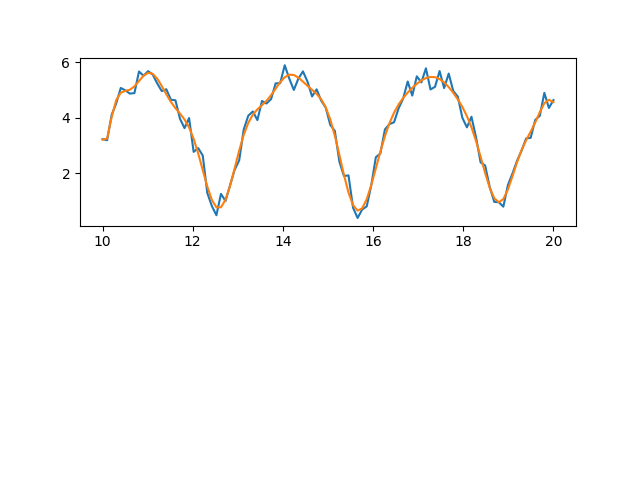

In [15]:
plt.figure(2)
plt.subplot(211)
plt.plot(X, y)
plt.plot(X, predictions);

Let's plot the residuals.

<IPython.core.display.Javascript object>


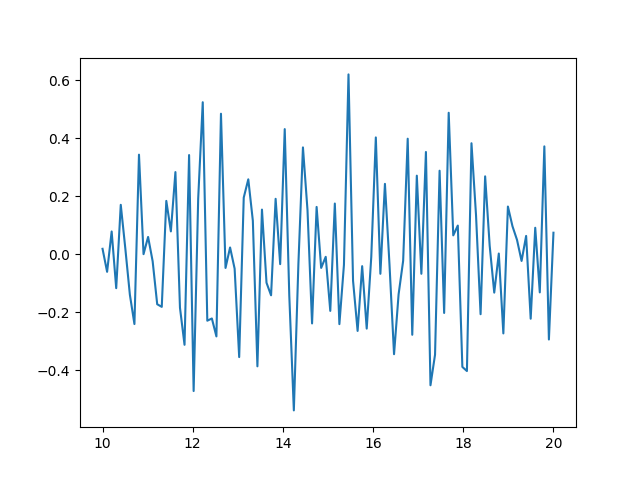

In [16]:
residuals = y - predictions
plt.figure(3)
plt.plot(X, residuals);